# Comparison of IMB performance with node locality

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
baseline = 'sameswitch'
compare = ['diffswitch']
sizelist = [0,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
bindings = ['sameswitch','diffswitch']

## Ping Pong

In [6]:
benchmark = 'PingPong'
nodelist = [2]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB PingPong performance relative to same switch placement
            #nodes
      #bytes         2
diffswitch
           0      0.00
           4      0.64
           8      0.64
          16      0.64
          32      0.65
          64      0.65
         128      0.65
         256      0.72
         512      0.73
        1024      0.74
        2048      0.76
        4096      0.76
        8192      0.80
       16384      0.85
       32768      0.88
       65536      0.92
      131072      0.93
      262144      0.96
      524288      0.94
     1048576      0.96
     2097152      0.97
     4194304      0.99


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


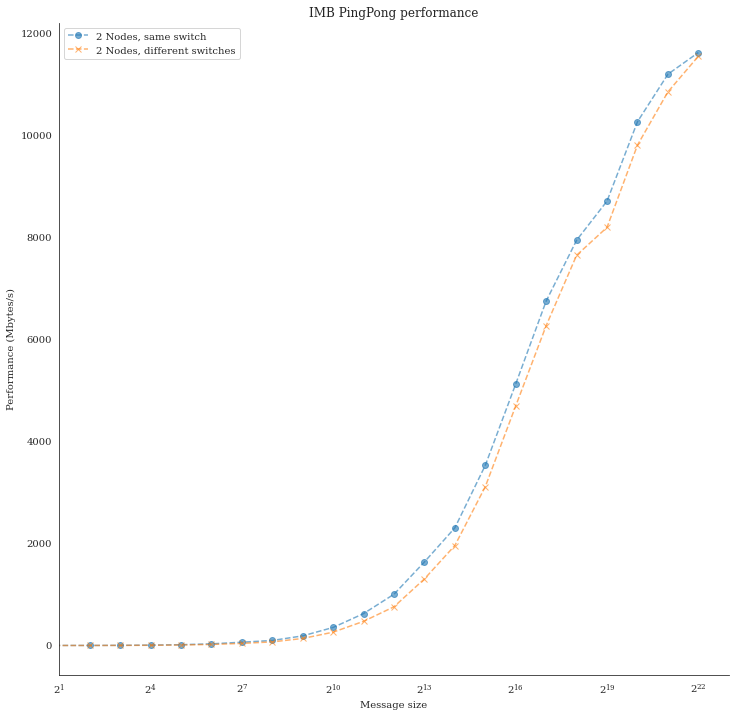

In [7]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)

plt.plot(sizelist, imb.get_size_scaling(sizelist, 2, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 2, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Performance (Mbytes/s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Sendrecv

In [8]:
benchmark = 'Sendrecv'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Sendrecv performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      0.00
           4      0.88
           8      1.24
          16      1.03
          32      1.11
          64      0.99
         128      1.46
         256      1.09
         512      0.86
        1024      1.02
        2048      0.98
        4096      0.99
        8192      1.51
       16384      0.82
       32768      0.86
       65536      0.88
      131072      0.93
      262144      0.95
      524288      1.01
     1048576      1.04
     2097152      1.05
     4194304      1.01


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


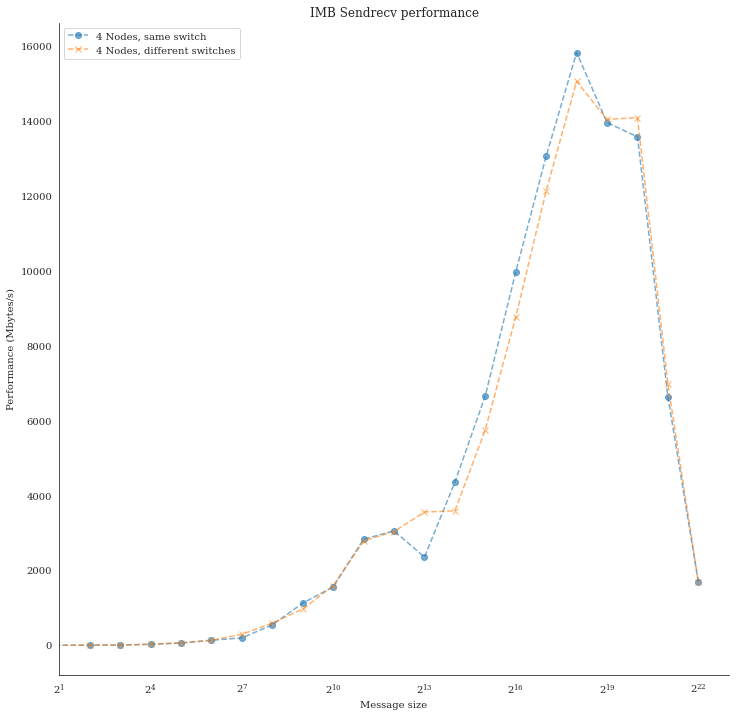

In [9]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Performance (Mbytes/s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allgather

In [10]:
benchmark = 'Allgather'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allgather performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      1.00
           4      1.10
           8      1.10
          16      1.09
          32      1.08
          64      1.05
         128      1.03
         256      0.99
         512      1.02
        1024      1.02
        2048      0.96
        4096      0.98
        8192      1.00
       16384      1.00
       32768      1.00
       65536      1.00
      131072      1.00
      262144      1.00
      524288      1.00
     1048576      1.00
     2097152      0.00
     4194304      0.00


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


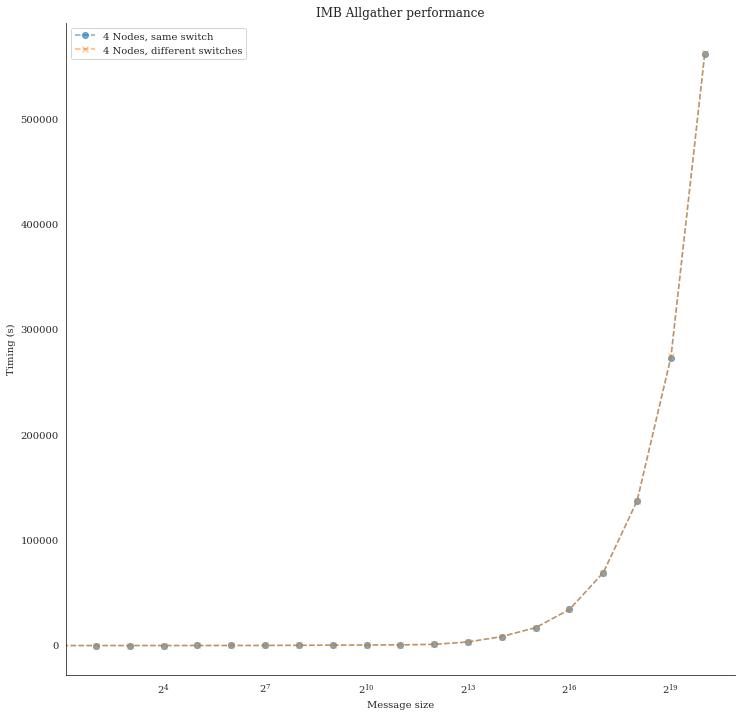

In [11]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allgatherv

In [12]:
benchmark = 'Allgatherv'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allgatherv performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      1.00
           4      1.07
           8      1.15
          16      1.03
          32      1.04
          64      1.03
         128      1.04
         256      1.02
         512      1.02
        1024      1.02
        2048      1.04
        4096      1.00
        8192      1.00
       16384      0.99
       32768      1.00
       65536      1.00
      131072      1.00
      262144      1.00
      524288      1.00
     1048576      1.01
     2097152      0.00
     4194304      0.00


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


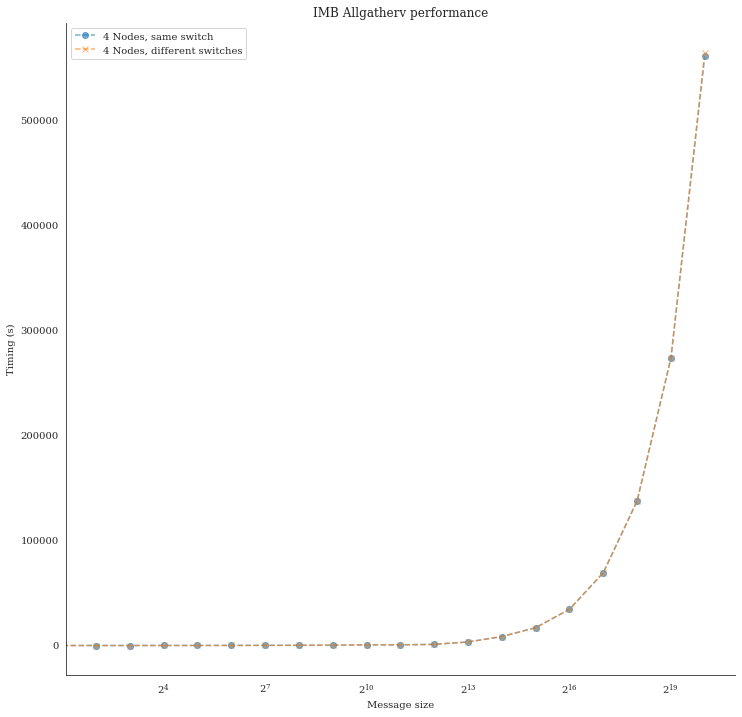

In [13]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Allreduce

In [14]:
benchmark = 'Allreduce'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Allreduce performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      1.00
           4      1.23
           8      1.18
          16      1.23
          32      1.24
          64      1.25
         128      1.16
         256      1.13
         512      1.09
        1024      1.09
        2048      1.08
        4096      1.09
        8192      1.11
       16384      1.07
       32768      1.06
       65536      1.03
      131072      1.02
      262144      1.02
      524288      1.01
     1048576      1.01
     2097152      1.02
     4194304      0.97


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


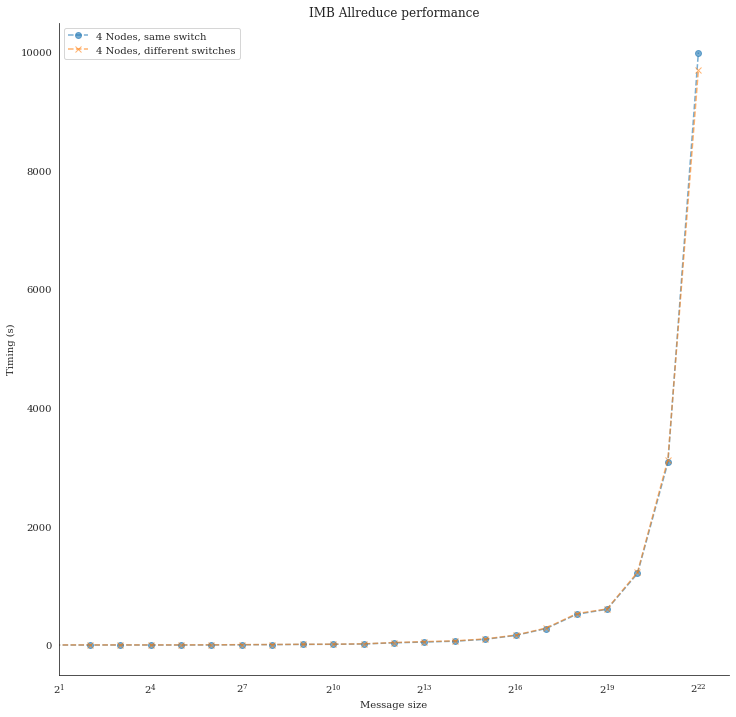

In [15]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Alltoall

In [16]:
benchmark = 'Alltoall'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Alltoall performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      1.00
           4      1.02
           8      1.02
          16      1.00
          32      1.00
          64      1.01
         128      1.03
         256      1.03
         512      1.01
        1024      0.88
        2048      0.98
        4096      1.00
        8192      1.04
       16384      0.99
       32768      1.01
       65536      1.02
      131072      1.02
      262144      1.02
      524288      1.01
     1048576      1.01
     2097152      0.00
     4194304      0.00


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


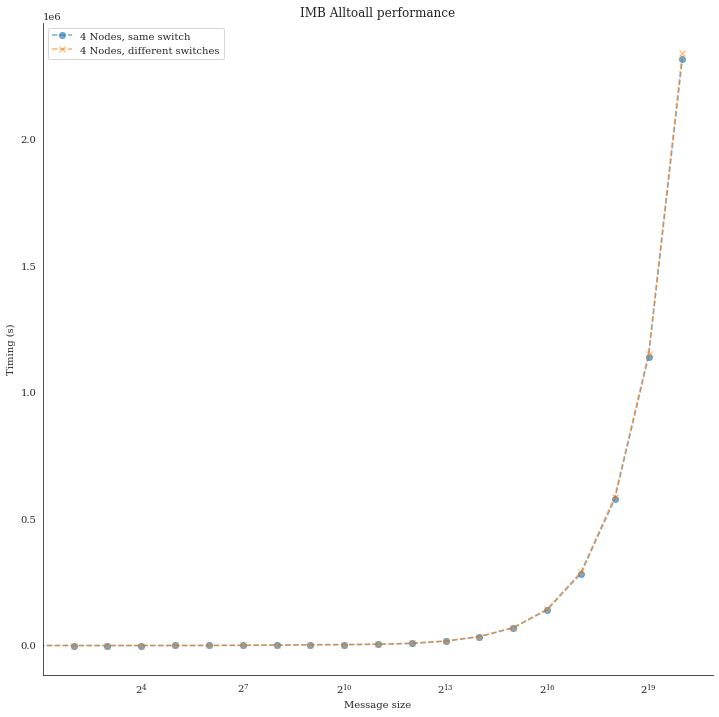

In [17]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')

## Alltoallv

In [18]:
benchmark = 'Alltoall'
nodelist = [4]
imb_perf = {}
for binding in bindings:
    tdict = {}
    for nodes in nodelist:
        pattern = f'IMB_{benchmark}_{nodes}nodes_*_{binding}_*.out'
        imbfiles = filemanip.get_filelist_pattern('../results/ARCHER2_CrayMPICH8016_nodeplacement', pattern)
        for file in imbfiles:
            imb_dict = imb.get_perf_dict(file, nodes)
            tdict.update(imb_dict)
    imb_perf[binding] = tdict

IMB Alltoall performance relative to same switch placement
            #nodes
      #bytes         4
diffswitch
           0      1.00
           4      1.02
           8      1.02
          16      1.00
          32      1.00
          64      1.01
         128      1.03
         256      1.03
         512      1.01
        1024      0.88
        2048      0.98
        4096      1.00
        8192      1.04
       16384      0.99
       32768      1.01
       65536      1.02
      131072      1.02
      262144      1.02
      524288      1.01
     1048576      1.01
     2097152      0.00
     4194304      0.00


/Users/aturner/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  import sys


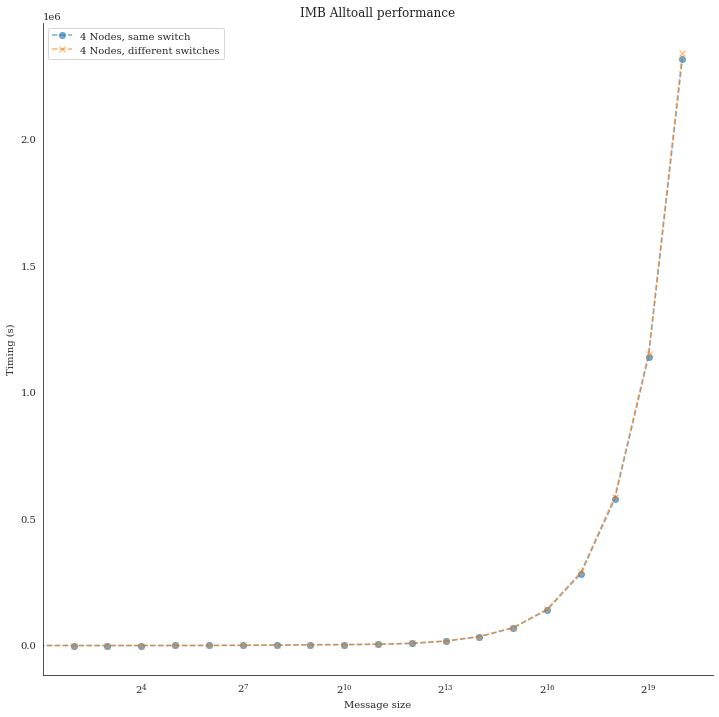

In [19]:
print("IMB {0} performance relative to same switch placement".format(benchmark))
imb_ratio = imb.analyse_perf_matrix(baseline, compare, nodelist, sizelist, imb_perf, invert=False)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['sameswitch']), '--o', label=f'{nodes} Nodes, same switch', alpha=0.6)
plt.plot(sizelist, imb.get_size_scaling(sizelist, 4, imb_perf['diffswitch']), '--x', label=f'{nodes} Nodes, different switches', alpha=0.6)

sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
plt.ylabel("Timing (s)")
plt.title(f'IMB {benchmark} performance')
plt.legend(loc='best')